In [89]:
!pip install networkx
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install --config-settings='--global-option=build_ext' --config-settings='--global-option=-I$(brew --prefix graphviz)/include/' --config-settings='--global-option=-L$(brew --prefix graphviz)/lib/' pygraphviz


In [90]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
from IPython.core.display import Image
from networkx.drawing.nx_agraph import to_agraph

basepath = os.path.join('..', 'images')
if not os.path.exists(basepath):
    os.makedirs(os.path.join(basepath), exist_ok=True)

# Aufgabe 07 - Page Rank als Simulation - Aurora's trip

Aurora hat in der Küche zu viel Katzengras erwischt und ist dementsprechend berauscht.
Sie können die Katze im untenstehenden Routinggraf der Wohnung Ihres Übungsleiters als „Random cat-agent“ annehmen,
der in jedem Zeitschritt zufällige Kanten wählt (auch zurück).
Wenn die Katze eines der drei Katzenbetten erreicht, legt sie sich dort schlafen (Katzenbetten sind Senken).
In welchem Bett wird Sie die Katze mit welcher Wahrscheinlichkeit nach einer sehr großen Anzahl an Zeitschritten auffinden?
Nach wie vielen Iterationen beträgt die Gesamtwahrscheinlichkeit, dass die Katze irgendein Bett erreicht, hat über 30\%?


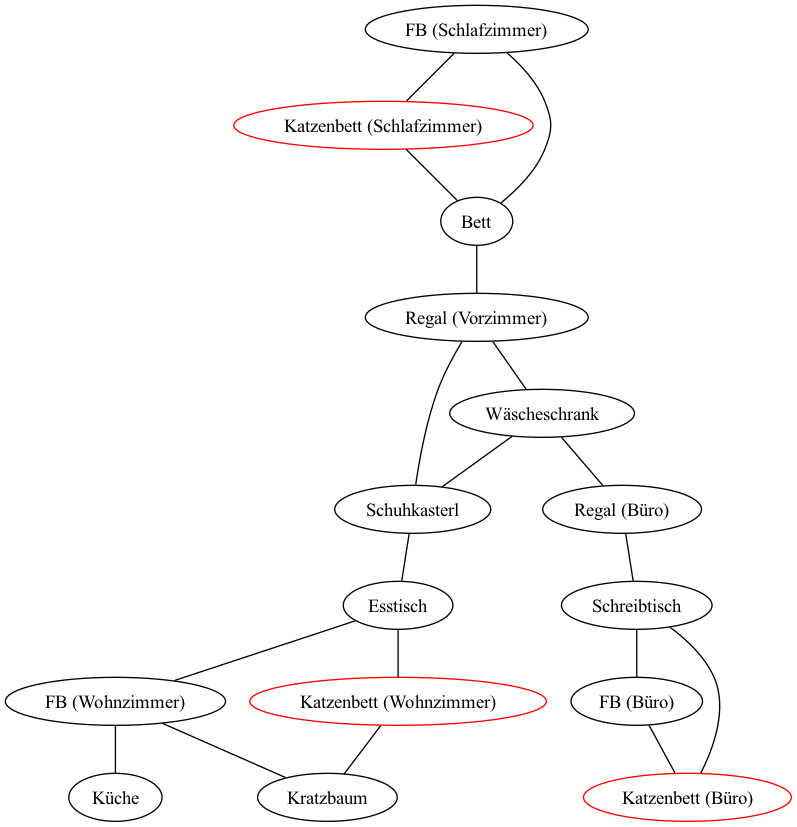

In [91]:
G = nx.Graph()

edges = [
    ('FB (Schlafzimmer)', 'Katzenbett (Schlafzimmer)'),
    ('FB (Schlafzimmer)', 'Bett'),
    ('Bett', 'FB (Schlafzimmer)'),
    ('Bett', 'Katzenbett (Schlafzimmer)'),
    ('Bett', 'Regal (Vorzimmer)'),
    ('Regal (Vorzimmer)', 'Bett'),
    ('Regal (Vorzimmer)', 'Wäscheschrank'),
    ('Regal (Vorzimmer)', 'Schuhkasterl'),
    ('Wäscheschrank', 'Regal (Vorzimmer)'),
    ('Wäscheschrank', 'Regal (Büro)'),
    ('Wäscheschrank', 'Schuhkasterl'),
    ('Regal (Büro)', 'Wäscheschrank'),
    ('Regal (Büro)', 'Schreibtisch'),
    ('Schreibtisch', 'FB (Büro)'),
    ('Schreibtisch', 'Katzenbett (Büro)'),
    ('Schreibtisch', 'Regal (Büro)'),
    ('FB (Büro)', 'Schreibtisch'),
    ('FB (Büro)', 'Katzenbett (Büro)'),
    ('Schuhkasterl', 'Regal (Vorzimmer)'),
    ('Schuhkasterl', 'Wäscheschrank'),
    ('Schuhkasterl', 'Esstisch'),
    ('Esstisch', 'Schuhkasterl'),
    ('Esstisch', 'FB (Wohnzimmer)'),
    ('Esstisch', 'Katzenbett (Wohnzimmer)'),
    ('FB (Wohnzimmer)', 'Esstisch'),
    ('FB (Wohnzimmer)', 'Küche'),
    ('FB (Wohnzimmer)', 'Kratzbaum'),
    ('Küche', 'FB (Wohnzimmer)'),
    ('Kratzbaum', 'FB (Wohnzimmer)'),
    ('Kratzbaum', 'Katzenbett (Wohnzimmer)'),
]
G.add_edges_from(edges)

d = 0.75
sinks = ['Katzenbett (Schlafzimmer)', 'Katzenbett (Büro)', 'Katzenbett (Wohnzimmer)']

g = to_agraph(G)
for sink in sinks:
    g.get_node(sink).attr['color'] = 'red'

graph_file = os.path.join(basepath, f'a07a_graph.png')
g.draw(graph_file, prog='dot', format='png')

display(Image(graph_file))

In [92]:
# Transitionmatrix P
P = nx.to_numpy_array(G, nodelist=sorted(G.nodes()))
display(pd.DataFrame(P))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
# Remove Sinks
nodes = list(sorted(filter(lambda n: n not in sinks, G.nodes)))
node_indices = list(map(lambda n: sorted(G.nodes()).index(n),nodes ))
P_filtered_1 = P[node_indices]
P_filtered = P_filtered_1[:, node_indices]
display(pd.DataFrame(P_filtered))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [94]:
# Normalize
P_norm = P_filtered / np.sum(P_filtered, axis=1, keepdims=True)
display(pd.DataFrame(P_norm))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000000,0.0,0.5,0.0,0.000000,0.000000,0.000000,0.500000,0.0,0.000000,0.000000
1,0.000000,0.000000,0.0,0.0,0.5,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.000000
2,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
3,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,0.000000,0.333333,0.0,0.0,0.0,0.333333,0.333333,0.000000,0.000000,0.0,0.000000,0.000000
5,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
6,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
7,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.500000
8,0.333333,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.333333
9,0.000000,0.000000,0.5,0.0,0.0,0.000000,0.000000,0.500000,0.000000,0.0,0.000000,0.000000


In [95]:
# Apply dampening function
n = P_norm.shape[0]
P_d = (1 - d) * P_norm + d / n * np.ones((n, n))
display(pd.DataFrame(P_d))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.062500,0.062500,0.0625,0.1875,0.0625,0.062500,0.062500,0.062500,0.187500,0.0625,0.062500,0.062500
1,0.062500,0.062500,0.0625,0.0625,0.1875,0.062500,0.062500,0.062500,0.062500,0.0625,0.187500,0.062500
2,0.062500,0.062500,0.0625,0.0625,0.0625,0.062500,0.062500,0.062500,0.062500,0.3125,0.062500,0.062500
3,0.312500,0.062500,0.0625,0.0625,0.0625,0.062500,0.062500,0.062500,0.062500,0.0625,0.062500,0.062500
4,0.062500,0.145833,0.0625,0.0625,0.0625,0.145833,0.145833,0.062500,0.062500,0.0625,0.062500,0.062500
5,0.062500,0.062500,0.0625,0.0625,0.3125,0.062500,0.062500,0.062500,0.062500,0.0625,0.062500,0.062500
6,0.062500,0.062500,0.0625,0.0625,0.3125,0.062500,0.062500,0.062500,0.062500,0.0625,0.062500,0.062500
7,0.062500,0.062500,0.0625,0.0625,0.0625,0.062500,0.062500,0.062500,0.062500,0.1875,0.062500,0.187500
8,0.145833,0.062500,0.0625,0.0625,0.0625,0.062500,0.062500,0.062500,0.062500,0.0625,0.145833,0.145833
9,0.062500,0.062500,0.1875,0.0625,0.0625,0.062500,0.062500,0.187500,0.062500,0.0625,0.062500,0.062500


In [96]:
# Calculate probability to stay stationary
I = np.eye(n)
Q = I - P_d.T
q = np.ones(n)
pi = np.linalg.solve(Q, q)
pi = pi / np.sum(pi)

In [97]:
# Calculate probabilities to stay in a sink
print('Probability to stay in sink i.e. for Aurora to get stick in a bed:')
sink_probabilities = {}
for sink in sinks:
    sink_index = sorted(G.nodes()).index(sink)
    probability = np.sum([P_d[nodes.index(node), sorted(nodes).index(node)] * pi[nodes.index(node)] for node in nodes if G.has_edge(node, sink)])
    sink_probabilities[sink] = probability
    print(f'{sink:>25}: {probability * 100:>.2f}%')


Probability to stay in sink i.e. for Aurora to get stick in a bed:
Katzenbett (Schlafzimmer): 1.01%
        Katzenbett (Büro): 1.03%
  Katzenbett (Wohnzimmer): 0.94%


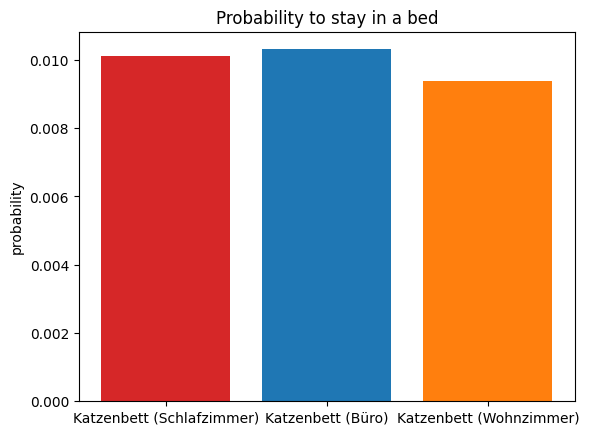

In [103]:
# Visualize probabilites for cat beds
fig, ax = plt.subplots()

bar_labels = ['red', 'blue', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

ax.bar(sinks, sink_probabilities.values(), label=sinks, color=bar_colors)

ax.set_ylabel('probability')
ax.set_title('Probability to stay in a bed')

plt.savefig(os.path.join(basepath, 'a07a_probability'))
plt.show()

In [99]:
# Calculate total probability that Aurora reaches a bed
total_probability = sum(sink_probabilities.values())
print(f'\nTotal Probability that Aurora reaches a bed: {total_probability * 100:>.2f}')

# Calculate the amount of iterations required to reach atleast 30%
itx = 0
p_cur = 0
while p_cur < 0.3:
    itx += 1
    p_cur = 1 - (1 - total_probability) ** itx

print(f'It took {itx:2} iterations to reach {p_cur * 100:>.2f}%')


Total Probability that Aurora reaches a bed: 2.98
It took 12 iterations to reach 30.46%
